In [6]:
from __future__ import division, print_function

import os
import numpy as np
import pandas as pd
from keras.preprocessing import image

from learning2learn.util import load_image_dataset, get_train_test_inds

## first try with initial parameters

In [12]:
data_folder = '../data/images_generated/'
nb_categories = 3
nb_exemplars = 2
nb_test = 5

In [13]:
X, shapes = load_image_dataset(
    data_folder, nb_categories, nb_exemplars,
    nb_test, target_size=(200, 200)
)

In [16]:
X.shape

(21, 200, 200, 3)

In [17]:
train_inds, test_inds = get_train_test_inds(nb_categories, nb_exemplars, len(shapes), nb_test)

In [18]:
%matplotlib inline
import matplotlib.pylab as plt

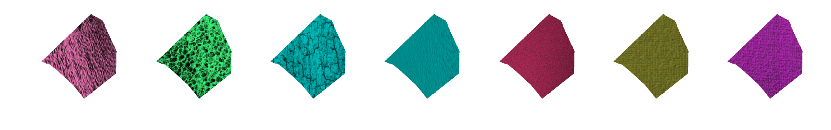

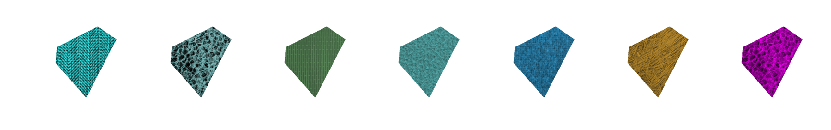

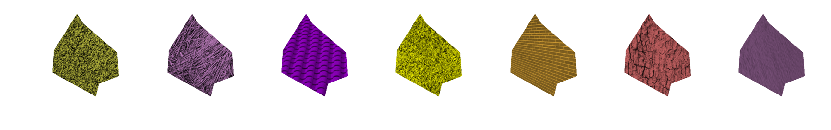

In [19]:
for i in range(nb_categories):
    fig, axes = plt.subplots(nrows=1, ncols=nb_exemplars+nb_test, figsize=(2*(nb_exemplars+nb_test),2))
    for j in range(nb_exemplars + nb_test):
        axes[j].imshow(X[i*(nb_exemplars+nb_test)+j])
        axes[j].axis('off')
    plt.show()

In [20]:
from learning2learn.models import simple_cnn

In [21]:
model = simple_cnn(input_shape=(200,200,3), nb_classes=nb_categories)
model.load_weights('../data/cnn_firstOrder.h5')

In [22]:
model.predict_classes(X)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2])

# now try with different model, different dataset parameters

In [23]:
nb_categories = 3
nb_exemplars = 3
nb_test = 5

In [24]:
X, shapes = load_image_dataset(
    data_folder, nb_categories, nb_exemplars,
    nb_test, target_size=(200, 200)
)

In [25]:
X.shape

(24, 200, 200, 3)

In [26]:
train_inds, test_inds = get_train_test_inds(nb_categories, nb_exemplars, len(shapes), nb_test)

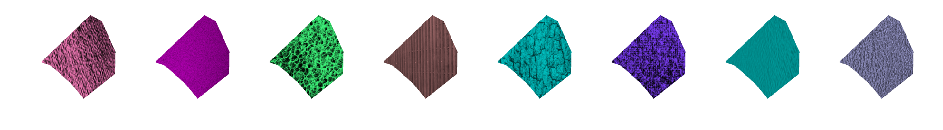

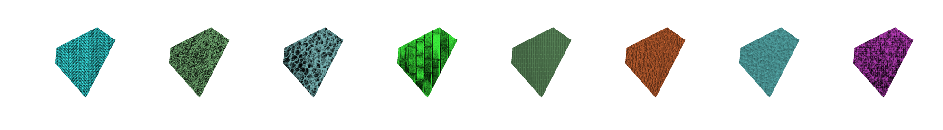

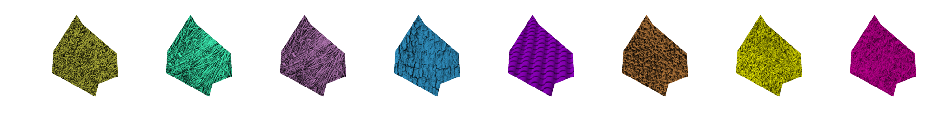

In [27]:
for i in range(nb_categories):
    fig, axes = plt.subplots(nrows=1, ncols=nb_exemplars+nb_test, figsize=(2*(nb_exemplars+nb_test),2))
    for j in range(nb_exemplars + nb_test):
        axes[j].imshow(X[i*(nb_exemplars+nb_test)+j])
        axes[j].axis('off')
    plt.show()

In [29]:
model = simple_cnn(input_shape=(200,200,3), nb_classes=nb_categories)
model.load_weights('../data/cnn_firstOrder.h5')

In [31]:
train_inds

[5, 6, 7, 13, 14, 15, 21, 22, 23]

In [33]:
preds = model.predict_classes(X)
print(list(enumerate(preds)))

[(0, 2), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 0), (18, 2), (19, 0), (20, 2), (21, 2), (22, 2), (23, 2)]
